# Data Cleaning and Data Transformation

This part demonstrates how to perform data cleaning with sk-learn.

- Filling in missing values
- Handling outliers
- Data Normalization
- (Noisy data handling usually associates with background knowledge, so we do not show some example here.)

This notebook was prepared by 周尧"(Email: mf1732194@smail.nju.edu.cn)

In [1]:
# code by python 3.5
# code about filling in missing values
import numpy  as np
from sklearn.preprocessing import  Imputer
imp=Imputer(missing_values='NaN',strategy='mean',axis=0)
# missing_values: means the value to be filled
# strategy : means choosing what value to fill the missing_values, usually can be mean, median and most_frequent
x=np.array([[1,2],
           [np.nan,3],
           [7,6]])
imp.fit(x)
print("Origin data :")
print(x)
print("Data after filling by mean: ")
print(imp.transform(x))

imp1 =Imputer(missing_values='NaN',strategy='median',axis=0)
x=np.array([[1,2],
           [np.nan,3],
           [7,6]])
imp1.fit(x)
print("Origin data :")
print(x)
print("Data after filling by median: ")
print(imp1.transform(x))

Origin data :
[[ 1.  2.]
 [nan  3.]
 [ 7.  6.]]
Data after filling by mean: 
[[1. 2.]
 [4. 3.]
 [7. 6.]]
Origin data :
[[ 1.  2.]
 [nan  3.]
 [ 7.  6.]]
Data after filling by median: 
[[1. 2.]
 [4. 3.]
 [7. 6.]]


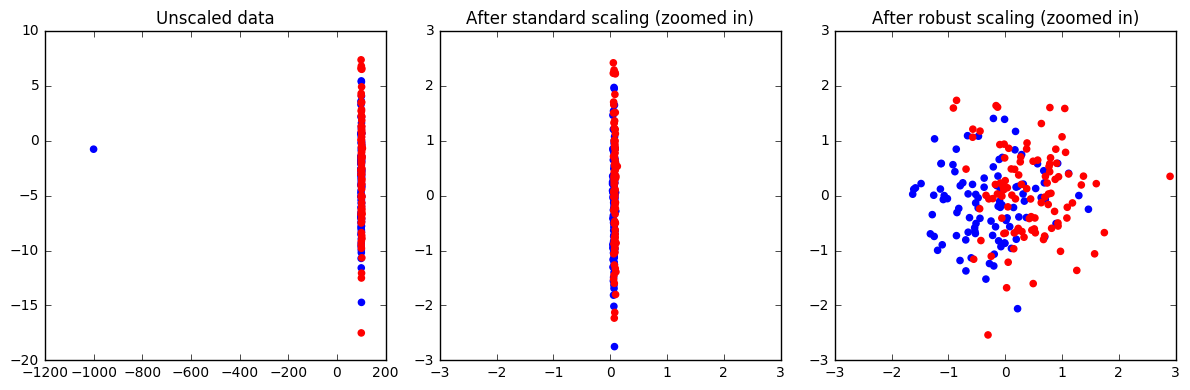

Testset accuracy using standard scaler: 0.545
Testset accuracy using robust scaler:   0.700


In [4]:
# code by python 3.5
# code about data Normalization
from sklearn import preprocessing
import numpy as np
# outliers detect will be introduced in the later chapters, here we just show how to handle a dataset with outliers
# we should use robust_scale or RobustScaler to estimate data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

# Create training and test data
np.random.seed(42)
n_datapoints = 100
Cov = [[0.9, 0.0], [0.0, 20.0]]
mu1 = [100.0, -3.0]
mu2 = [101.0, -3.0]
X1 = np.random.multivariate_normal(mean=mu1, cov=Cov, size=n_datapoints)
X2 = np.random.multivariate_normal(mean=mu2, cov=Cov, size=n_datapoints)
Y_train = np.hstack([[-1]*n_datapoints, [1]*n_datapoints])
X_train = np.vstack([X1, X2])

X1 = np.random.multivariate_normal(mean=mu1, cov=Cov, size=n_datapoints)
X2 = np.random.multivariate_normal(mean=mu2, cov=Cov, size=n_datapoints)
Y_test = np.hstack([[-1]*n_datapoints, [1]*n_datapoints])#在水平方向上平铺
X_test = np.vstack([X1, X2])#在竖直方向上堆叠

X_train[0, 0] = -1000  # a fairly large outlier


# Scale data
standard_scaler = StandardScaler()#标准化
Xtr_s = standard_scaler.fit_transform(X_train)
Xte_s = standard_scaler.transform(X_test)

robust_scaler = RobustScaler()#针对离群点做标准化处理
Xtr_r = robust_scaler.fit_transform(X_train)
Xte_r = robust_scaler.fit_transform(X_test)


# Plot data
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(X_train[:, 0], X_train[:, 1],
              color=np.where(Y_train > 0, 'r', 'b'))
ax[1].scatter(Xtr_s[:, 0], Xtr_s[:, 1], color=np.where(Y_train > 0, 'r', 'b'))
ax[2].scatter(Xtr_r[:, 0], Xtr_r[:, 1], color=np.where(Y_train > 0, 'r', 'b'))
ax[0].set_title("Unscaled data")
ax[1].set_title("After standard scaling (zoomed in)")
ax[2].set_title("After robust scaling (zoomed in)")
# for the scaled data, we zoom in to the data center (outlier can't be seen!)
for a in ax[1:]:
    a.set_xlim(-3, 3)
    a.set_ylim(-3, 3)
plt.tight_layout()
plt.show()


# Classify using k-NN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(Xtr_s, Y_train)
acc_s = knn.score(Xte_s, Y_test)
print("Testset accuracy using standard scaler: %.3f" % acc_s)
knn.fit(Xtr_r, Y_train)
acc_r = knn.score(Xte_r, Y_test)
print("Testset accuracy using robust scaler:   %.3f" % acc_r)

In [3]:
# code by python 3.5
# code about data Normalization
from sklearn import preprocessing
import numpy as np
print("origin data : ")
X = np.array([[ 1., -1.,  2.],
               [ 2.,  0.,  0.],
               [ 0.,  1., -1.]])
print(X)
# in the way of Z-Score
X_scaled = preprocessing.scale(X)
print("data after Z-Score : ")
print(X_scaled)
print("data mean after Z-Score : ")
print(X_scaled.mean(axis=0))
print("data std after Z-Score : ")
print(X_scaled.std(axis=0))

# in the way of max_min range
X_test = np.array([[ -3., -1.,  4.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)
print("data after min_max(0,1) : ")
print(X_train_minmax)

# in the way of data normalize(make the choosing norm to be 1)
X_normalized = preprocessing.normalize(X, norm='l2') # here choose l2-norm
print("data after data normalize : ")
print(X_normalized)

origin data : 
[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
data after Z-Score : 
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
data mean after Z-Score : 
[0. 0. 0.]
data std after Z-Score : 
[1. 1. 1.]
data after min_max(0,1) : 
[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
data after data normalize : 
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]


## Dimension Reduction

This part demonstrates how to perform data reduction with sk-learn. We show an example by using PCA


Data view befroe PCA :


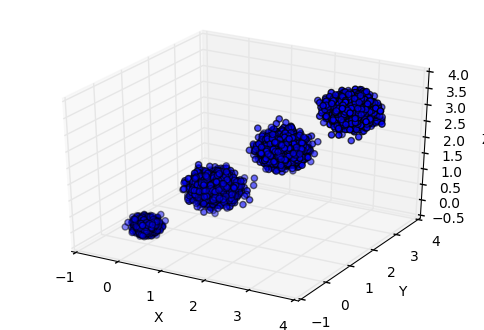

Data view after 2_components PCA :


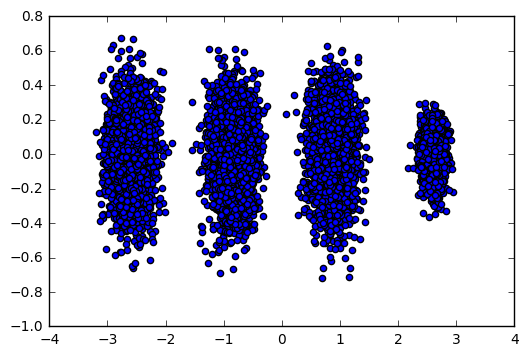

variance of each principal component after PCA : 
[0.98318212 0.00850037 0.00831751]
[3.78483785 0.03272285 0.03201892]
do PCA
We can see that only one dimension rest, because the variance ratio of first dimension is 0.98, which is up to 0.95, so we abadon the rest dimension
[0.98318212]
[3.78483785]


In [4]:
# code by python 3.5
# code about PCA 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA
# X is features and Y is the classX. We generate 1000 data samples. Each sample has three features and we have four classes
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)
# show data view before PCA
print("Data view befroe PCA :")
ax = plt.subplot(111, projection='3d')  
ax.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')  
ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()
#Start to do PCA, first way: select the dimension
pca = PCA(n_components=2) # We reduce 3 dimension to 2 dimension
pca.fit(X)
X_new = pca.transform(X)
#show data view after PCA
print("Data view after 2_components PCA :")
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

#Start to do PCA, second way: select variance threshold
# we first calculate the variance on each dimension before PCA
print("variance of each principal component after PCA : ")
pca = PCA(n_components=3)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print("do PCA")
# do PCA
pca = PCA(n_components=0.95) # We set the variance ratio threshold as 0.95
pca.fit(X)
print("We can see that only one dimension rest, because the variance ratio of first dimension is 0.98, which is up to 0.95, so we abadon the rest dimension")
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)